In [1]:
import numpy as np
import scipy
import sys
import math
import scipy.special
import scipy.constants as const
from math import factorial
from scipy.special import hermite
import matplotlib.pyplot as plt
import random
import importlib
from libraryMetropolis import delta_choice
from libraryMetropolis import Metropolis
from libraryMetropolis import kinetic_energy_integrand
from libraryMetropolis import numerical_integrand
from libraryMetropolis import total_wf
from libraryMetropolis import kinetic_energy_integrand_2

import libraryMetropolis as lib
importlib.reload(lib)

<module 'libraryMetropolis' from '/Users/bellamarco01/uni/2_computational/computational_physics/homework 4/libraryMetropolis.py'>

In [2]:
sigma=1
N=2
N_up=0
R = np.zeros((N,2))
acc, counter=0,0
for i in range(len(R)):
    for j in range(len(R[0])):
        R[i][j]=random.uniform(0,1)   #r[x o y][particella]
        
delta=1
b_par = 1
b_orth = 1
omega=1
jj= False                    # use or not Jastrow
moves=20000
Neq=int(moves*3/10)
N_delta=1000
acc_list = []
kinetic_energy1=[]
kinetic_energy2=[]
potential = []
E_tot=[]
E_tot2=[]
x1=[]
y1=[]
energy=0
h=0.0001

In [3]:
def f(r): 
    return total_wf(N, N_up, r, sigma, b_par, b_orth, use_chi=True, return_A=False)[0]

In [4]:
def potential_energy(omega,R):
    pot=0
    for i in range(len(R)):
        r = R[i][0]**2 + R[i][1]**2
        pot+=0.5*omega**2*r

    return pot

In [5]:
delta = delta_choice(N, N_up, R, sigma, b_par, b_orth, delta, counter, acc,N_delta,jj)

for i in range(moves):
    R,acc, counter = Metropolis(N, N_up, R, sigma, b_par, b_orth, delta, counter, acc ,jj)
    Kin = kinetic_energy_integrand(N,N_up,R,sigma,b_par,b_orth,omega,use_chi=True)
    Kin2 = kinetic_energy_integrand_2(N,N_up,R,sigma,b_par,b_orth,omega,use_chi=True)
    pot_en = potential_energy(omega,R)
    x1.append(R[0][0])
    y1.append(R[0][1])
    
    if i>=Neq:
        kinetic_energy1.append(Kin)
        potential.append(pot_en)
        kinetic_energy2.append(Kin2)
     #   energy += (Kin+pot_en)
        energy += (Kin2+pot_en)
        E_tot2.append((1/(i-Neq+1))*(energy))

    acc_list.append(acc/counter)


print(f'sigma={sigma},\u0394={round(delta,3)}')


1.1134989353462106 1.113498935346209
1.1134989353462106 1.113498935346209
2.2202383723668513 2.220238372366852
2.2202383723668513 2.220238372366852
2.2202383723668513 2.220238372366852
0.2777418612691648 0.27774186126916467
0.2777418612691648 0.27774186126916467
0.3832595808705191 0.3832595808705186
1.6428852966622611 1.6428852966622611
1.3120151295211289 1.3120151295211286
1.2327455777813727 1.2327455777813716
1.2327455777813727 1.2327455777813716
1.2327455777813727 1.2327455777813716
0.375666640228457 0.375666640228456
0.375666640228457 0.375666640228456
0.2683938880225302 0.26839388802253045
0.2683938880225302 0.26839388802253045
0.2683938880225302 0.26839388802253045
0.2683938880225302 0.26839388802253045
0.2683938880225302 0.26839388802253045
0.10424012917118276 0.10424012917118292
0.336594986218846 0.33659498621884437
1.1272679810667292 1.127267981066729
3.2111594704320034 3.2111594704320043
3.2111594704320034 3.2111594704320043
1.3525384135981293 1.3525384135981289
1.35253841359

Text(0.5, 1.0, 'Acceptance rate')

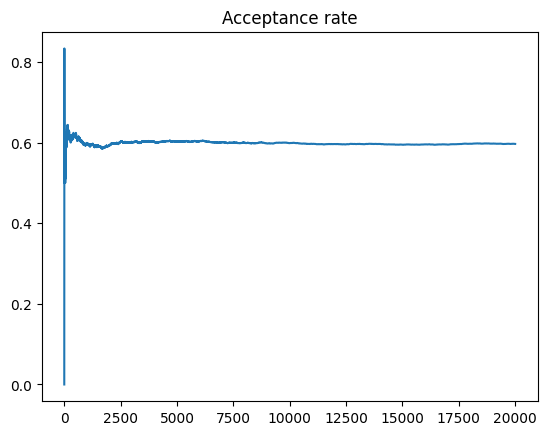

In [376]:
plt.plot(np.array(range(moves)),acc_list)
plt.title('Acceptance rate')

Text(0.5, 1.0, 'Total energy')

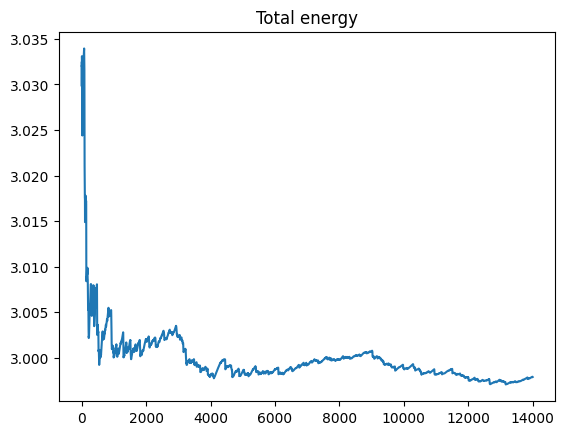

In [379]:
plt.plot(np.array(range(moves-Neq)),E_tot2)
#plt.plot(np.array(range(moves-Neq))[48000:],E_tot2[48000:])
plt.title('Total energy')

2.9978870160221276
Average energy: 2.999803292090611


Text(0.5, 1.0, 'x1')

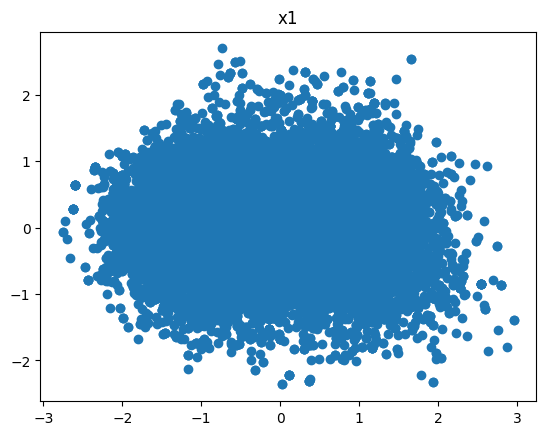

In [380]:
print(E_tot2[moves-Neq-1])
average_E = np.mean(E_tot2)
print(f'Average energy: {average_E}')



plt.scatter(x1,y1)
plt.title('x1')

In [381]:
sigma=1
N_up=0

R = np.zeros((N,2))
acc, counter=0,0
for i in range(len(R)):
    for j in range(len(R[0])):
        R[i][j]=random.uniform(0,1)   #r[x o y][particella]
        
delta=1
b_par = 1
b_orth = 1
omega=1
jj= False                    # use or not Jastrow
moves=100000
Neq=int(moves*3/10)
N_delta=1000

acc_list20 = []
acc_list21 = []
acc_list30 = []
acc_list31 = []
acc_list32 = []

E_tot20=[]
E_tot21=[]
E_tot30=[]
E_tot31=[]
E_tot32=[]
for j in range(2,4):
    for k in range(j):
        energy=0
        R = np.zeros((j,2))
        acc, counter=0,0
        for t in range(len(R)):
            for l in range(len(R[0])):
                R[t][l]=random.uniform(0,1)   #r[x o y][particella]


        delta = delta_choice(j, k, R, sigma, b_par, b_orth, delta, counter, acc,N_delta,jj)

        for i in range(moves):
            R,acc, counter = Metropolis(j, k, R, sigma, b_par, b_orth, delta, counter, acc ,jj)
            Kin = kinetic_energy_integrand(j,k,R,sigma,b_par,b_orth,omega,use_chi=True)
            pot_en = potential_energy(omega,R)
       
            if i>=Neq:
                energy += (Kin+pot_en)
                if j == 2:
                    if k==0:
                        E_tot20.append((1/(i-Neq+1))*(energy))
                        acc_list20.append(acc/counter)
                    elif k==1:
                        E_tot21.append((1/(i-Neq+1))*(energy))
                        acc_list21.append(acc/counter)
                elif j==3:
                    if k==0:
                        E_tot30.append((1/(i-Neq+1))*(energy))
                        acc_list30.append(acc/counter)
                    elif k==1:
                        E_tot31.append((1/(i-Neq+1))*(energy))
                        acc_list31.append(acc/counter)
                    elif k==2:
                        E_tot32.append((1/(i-Neq+1))*(energy))
                        acc_list32.append(acc/counter)
        


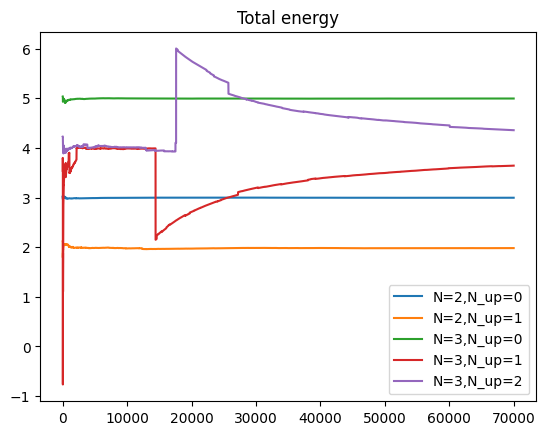

In [382]:
plt.plot(np.array(range(moves-Neq)),E_tot20,label='N=2,N_up=0')
plt.plot(np.array(range(moves-Neq)),E_tot21,label='N=2,N_up=1')
plt.plot(np.array(range(moves-Neq)),E_tot30,label='N=3,N_up=0')
plt.plot(np.array(range(moves-Neq)),E_tot31,label='N=3,N_up=1')
plt.plot(np.array(range(moves-Neq)),E_tot32,label='N=3,N_up=2')
plt.title('Total energy')
plt.legend(loc="lower right")